In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from itertools import cycle, islice, product
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import homogeneity_completeness_v_measure, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds = pd.read_csv('./content/winequality.csv', 
                 header=0, index_col=0, parse_dates=True)
ds.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
fixed acidity,,,,,,,,,,,,,
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [3]:
ds.shape

(6497, 13)

In [67]:
col_numbers=[1,0,7,10]
# col_numbers=[0,1,2,3]
_columns=[ds.columns[col] for col in col_numbers]
_columns

['citric acid', 'volatile acidity', 'pH', 'quality']

In [68]:
D1 = pd.DataFrame(data=ds, columns=_columns)
D1

,citric acid,volatile acidity,pH,quality
fixed acidity,,,,
7.4,0.00,0.70,3.51,5
7.8,0.00,0.88,3.20,5
7.8,0.04,0.76,3.26,5
11.2,0.56,0.28,3.16,6
7.4,0.00,0.70,3.51,5
...,...,...,...,...
6.2,0.29,0.21,3.27,6
6.6,0.36,0.32,3.15,5
6.5,0.19,0.24,2.99,6


In [69]:
pca = PCA(n_components=2)
D2 = pca.fit_transform(D1)
print('Доля объясненной дисперсии: {}, сумма = {}'.format(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)))

Доля объясненной дисперсии: [0.91404122 0.04731655], сумма = 0.961357767317248


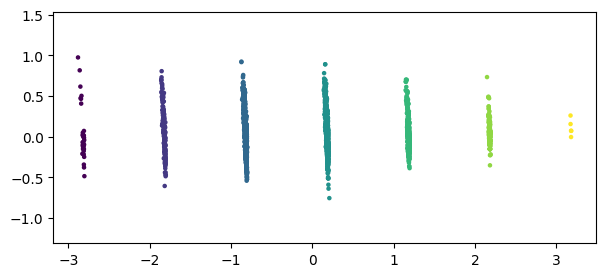

In [70]:
plt.figure(figsize=(7,3))
plt.scatter(D2[:, 0], D2[:, 1], s=5, c=ds['quality'])
plt.axis('equal')
plt.show()

In [71]:
tsne = TSNE(n_components=2)
D3 = tsne.fit_transform(D1)

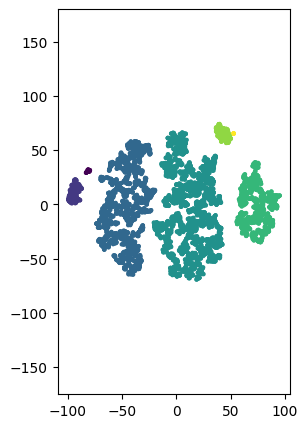

In [73]:
plt.figure(figsize=(3,5))
plt.scatter(D3[:, 0], D3[:, 1], s=5, c=ds['quality'])
plt.axis('equal')
plt.show()

In [74]:
def do_clustering(cluster_datasets, method):
    """
    Выполнение кластеризации для данных примера
    """
    cluster_results = []
    for X in cluster_datasets:
        temp_cluster = method.fit_predict(X)
        cluster_results.append(temp_cluster)
    return cluster_results

In [75]:
def visualize_clusters(cluster_datasets, cluster_results):
    """
    Визуализация результатов кластерного анализа
    """
    plt.subplots(figsize=(10,7))
    plot_num = 0
    for X, y_pred in zip(cluster_datasets, cluster_results):
        plot_num += 1
        plt.subplot(2, 3, plot_num)
        # Цвета точек как результат кластеризации
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # черный цвет для выделяющихся значений
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=3, color=colors[y_pred])
#         plt.xlim(-2.5, 2.5)
#         plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.title(datasets_names[plot_num-1])
    
    plt.show()

In [76]:
cluster_datasets = [D2, D3]
cluster_datasetD1 = [D1]
# cluster_datasets23 = [D2, D3]
datasets_names = ['D2', 'D3']

In [79]:
%time result_KMeans_3 = do_clustering(cluster_datasets, KMeans(n_clusters=3))

CPU times: total: 422 ms
Wall time: 120 ms


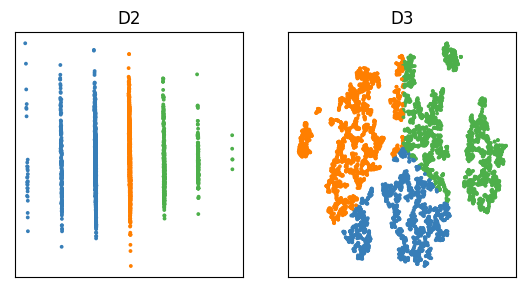

In [80]:
visualize_clusters(cluster_datasets, result_KMeans_3)

In [81]:
result_KMeans_3

[array([0, 0, 0, ..., 1, 2, 1]), array([1, 1, 1, ..., 0, 2, 2])]

In [84]:
%time result_KMeans_3_D1 = do_clustering(cluster_datasetD1, KMeans(n_clusters=3))
result_KMeans_3_D1

CPU times: total: 93.8 ms
Wall time: 46.6 ms


[array([2, 2, 2, ..., 1, 0, 1])]

In [89]:
# D1
adjusted_rand_score(ds['quality'], result_KMeans_3_D1[0])

0.9218882600043826

In [90]:
# D2
adjusted_rand_score(ds['quality'], result_KMeans_3[0])

0.9218882600043826

In [92]:
# D3
adjusted_rand_score(ds['quality'], result_KMeans_3[1])

0.3231031215011017

In [94]:
# D1
h1, c1, v1 = homogeneity_completeness_v_measure(ds['quality'], result_KMeans_3_D1[0])
h1, c1, v1

(0.8239400871915546, 1.0000000000000002, 0.9034727543712598)

In [95]:
# D2
h2, c2, v2 = homogeneity_completeness_v_measure(ds['quality'], result_KMeans_3[0])
h2, c2, v2

(0.8239400871915544, 1.0, 0.9034727543712595)

In [96]:
# D3
h3, c3, v3 = homogeneity_completeness_v_measure(ds['quality'], result_KMeans_3[1])
h3, c3, v3

(0.40427180461144047, 0.47167445061932634, 0.43537986537941004)

In [97]:
# D1
sscore1 = silhouette_score(cluster_datasetD1[0], result_KMeans_3_D1[0])
sscore1

0.6473215011400948

In [98]:
# D2
sscore2 = silhouette_score(cluster_datasets[0], result_KMeans_3[0])
sscore2

0.7359522174496113

In [99]:
# D3
sscore3 = silhouette_score(cluster_datasets[1], result_KMeans_3[1])
sscore3

0.37622878

In [100]:
# следующий метод кластеризации
%time result_DBSCAN = do_clustering(cluster_datasets, DBSCAN(eps=4, min_samples=5))

CPU times: total: 906 ms
Wall time: 919 ms


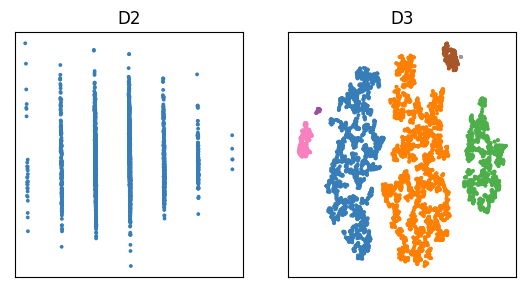

In [101]:
visualize_clusters(cluster_datasets, result_DBSCAN)

In [102]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [103]:
############################## D1 #######################################
%%time
eps_search_values = np.arange(0.02, 1, 0.02)
min_pts_search_values = np.arange(2, 50, 2)
segm_pars = list(product(eps_search_values, min_pts_search_values))
# segm_pars
checked_eps = []
checked_min_pts = []
clusters_cnt = []
for i in segm_pars:
    search_clustering = DBSCAN(eps=i[0], min_samples=i[1], algorithm='ball_tree').fit(D1)
    checked_eps.append(i[0])
    checked_min_pts.append(i[1])
    clusters_cnt.append(len(np.unique(search_clustering.labels_)))
zipped_data = list(zip(checked_eps, checked_min_pts, clusters_cnt))
check_df = pd.DataFrame(zipped_data, columns=['eps', 'min_pts', 'clusters_cnt'])
check_df

CPU times: total: 6min 54s
Wall time: 7min 20s


,eps,min_pts,clusters_cnt
0,0.02,2,1208
1,0.02,4,228
2,0.02,6,79
3,0.02,8,35
4,0.02,10,16
5,0.02,12,7
6,0.02,14,2
7,0.02,16,1
8,0.02,18,1
9,0.02,20,1


In [104]:
check_df_7 = check_df[check_df['clusters_cnt']==8]
check_df_7

,eps,min_pts,clusters_cnt
36,0.04,26,8
57,0.06,20,8
58,0.06,22,8
59,0.06,24,8
100,0.10,10,8
103,0.10,16,8
130,0.12,22,8
194,0.18,6,8
314,0.28,6,8
338,0.30,6,8


In [105]:
%time result_DBSCAN_D1 = do_clustering(cluster_datasetD1, DBSCAN(eps=0.32, min_samples=6))

CPU times: total: 484 ms
Wall time: 492 ms


In [106]:
result_DBSCAN_D1[0]

array([0, 0, 0, ..., 1, 2, 1], dtype=int64)

In [107]:
adjusted_rand_score(ds['quality'], result_DBSCAN_D1[0])

0.9989101119350042

In [108]:
h1_DBSCAN, c1_DBSCAN, v1_DBSCAN = homogeneity_completeness_v_measure(ds['quality'], result_DBSCAN_D1[0])
h1_DBSCAN, c1_DBSCAN, v1_DBSCAN

(0.9985250214783866, 0.9937905878388664, 0.9961521793295415)

In [109]:
######################## D2 ################################
%%time
eps_search_values = np.arange(0.02, 1, 0.02)
min_pts_search_values = np.arange(2, 50, 2)
segm_pars = list(product(eps_search_values, min_pts_search_values))
# segm_pars
checked_eps = []
checked_min_pts = []
clusters_cnt = []
for i in segm_pars:
    search_clustering = DBSCAN(eps=i[0], min_samples=i[1], algorithm='ball_tree').fit(D2)
    checked_eps.append(i[0])
    checked_min_pts.append(i[1])
    clusters_cnt.append(len(np.unique(search_clustering.labels_)))
zipped_data = list(zip(checked_eps, checked_min_pts, clusters_cnt))
check_df = pd.DataFrame(zipped_data, columns=['eps', 'min_pts', 'clusters_cnt'])
check_df

CPU times: total: 4min 48s
Wall time: 4min 59s


,eps,min_pts,clusters_cnt
0,0.02,2,48
1,0.02,4,22
2,0.02,6,19
3,0.02,8,18
4,0.02,10,17
5,0.02,12,14
6,0.02,14,12
7,0.02,16,13
8,0.02,18,9
9,0.02,20,8


In [110]:
check_df_7 = check_df[check_df['clusters_cnt']==8]
check_df_7

,eps,min_pts,clusters_cnt
9,0.02,20,8
18,0.02,38,8
19,0.02,40,8
20,0.02,42,8
31,0.04,16,8
32,0.04,18,8
33,0.04,20,8
35,0.04,24,8
36,0.04,26,8
50,0.06,6,8


In [111]:
cluster_datasetD2 = [D2]

In [112]:
%time result_DBSCAN_D2 = do_clustering(cluster_datasetD2, DBSCAN(eps=0.30, min_samples=6))

CPU times: total: 328 ms
Wall time: 305 ms


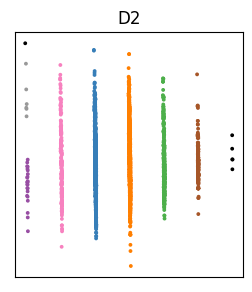

In [113]:
visualize_clusters(cluster_datasetD2, result_DBSCAN_D2)

In [114]:
%%time
eps_search_values_sil2 = np.arange(0.02, 1, 0.02)
min_pts_search_values_sil2 = np.arange(2, 50, 2)
segm_pars_sil2 = list(product(eps_search_values_sil2, min_pts_search_values_sil2))
# segm_pars_sil2
checked_eps_sil2 = []
checked_min_pts_sil2 = []
clusters_cnt_sil2 = []
sil_score2 = []
for i in segm_pars_sil2:
    search_clustering_sil2 = DBSCAN(eps=i[0], min_samples=i[1], algorithm='ball_tree').fit(D2)
    checked_eps_sil2.append(i[0])
    checked_min_pts_sil2.append(i[1])
    clusters_cnt_sil2.append(len(np.unique(search_clustering_sil2.labels_)))
    sil_score2.append(metrics.silhouette_score(D2, search_clustering_sil2.labels_))
zipped_data_sil2 = list(zip(checked_eps_sil2, checked_min_pts_sil2, clusters_cnt_sil2, sil_score2))
check_df_sil2 = pd.DataFrame(zipped_data_sil2, columns=['eps', 'min_pts', 'clusters_cnt', 'sil_score'])
check_df_sil2

CPU times: total: 33min 53s
Wall time: 32min 46s


,eps,min_pts,clusters_cnt,sil_score
0,0.02,2,48,0.362318
1,0.02,4,22,0.481479
2,0.02,6,19,0.531727
3,0.02,8,18,0.522468
4,0.02,10,17,0.598452
5,0.02,12,14,0.525732
6,0.02,14,12,0.514337
7,0.02,16,13,0.524018
8,0.02,18,9,0.561073
9,0.02,20,8,0.554623


In [115]:
check_df_some = check_df_sil2[check_df_sil2['clusters_cnt']==8]
check_df_some

,eps,min_pts,clusters_cnt,sil_score
9,0.02,20,8,0.554623
18,0.02,38,8,0.438859
19,0.02,40,8,0.434341
20,0.02,42,8,0.429262
31,0.04,16,8,0.720780
32,0.04,18,8,0.718440
33,0.04,20,8,0.717623
35,0.04,24,8,0.734174
36,0.04,26,8,0.731129
50,0.06,6,8,0.769754


CPU times: total: 297 ms
Wall time: 312 ms


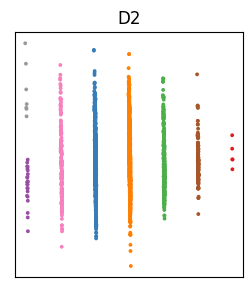

In [116]:
%time result_DBSCAN_D2 = do_clustering(cluster_datasetD2, DBSCAN(eps=0.32, min_samples=4))
visualize_clusters(cluster_datasetD2, result_DBSCAN_D2)

In [117]:
adjusted_rand_score(ds['quality'], result_DBSCAN_D2[0])

0.9999827013998498

In [118]:
h2_DBSCAN, c2_DBSCAN, v2_DBSCAN = homogeneity_completeness_v_measure(ds['quality'], result_DBSCAN_D2[0])
h2_DBSCAN, c2_DBSCAN, v2_DBSCAN

(1.0000000000000002, 0.9980344030956236, 0.9990162347048025)

In [128]:
####################### D3 ######################

# %%time
# eps_search_values_sil2 = np.arange(0.04, 1, 0.04)
# min_pts_search_values_sil2 = np.arange(2, 50, 2)
# segm_pars_sil2 = list(product(eps_search_values_sil2, min_pts_search_values_sil2))
# # segm_pars_sil2
# checked_eps_sil2 = []
# checked_min_pts_sil2 = []
# clusters_cnt_sil2 = []
# sil_score2 = []
# for i in segm_pars_sil2:
#     search_clustering_sil2 = DBSCAN(eps=i[0], min_samples=i[1], algorithm='ball_tree').fit(D)
#     checked_min_pts_sil2.append(i[1])
#     clusters_cnt_sil2.append(len(np.unique(search_clustering_sil2.labels_)))
#     sil_score2.append(metrics.silhouette_score(D3, search_clustering_sil2.labels_))
# zipped_data_sil2 = list(zip(checked_eps_sil2, checked_min_pts_sil2, clusters_cnt_sil2, sil_score2))
# check_df_sil2 = pd.DataFrame(zipped_data_sil2, columns=['eps', 'min_pts', 'clusters_cnt', 'sil_score'])
# check_df_sil2
######################## D2 ################################
%time
eps_search_values = np.arange(0.02, 1, 0.02)
min_pts_search_values = np.arange(2, 50, 2)
segm_pars = list(product(eps_search_values, min_pts_search_values))
# segm_pars
checked_eps = []
checked_min_pts = []
clusters_cnt = []
for i in segm_pars:
    search_clustering = DBSCAN(eps=i[0], min_samples=i[1], algorithm='ball_tree').fit(D3)
    checked_eps.append(i[0])
    checked_min_pts.append(i[1])
    clusters_cnt.append(len(np.unique(search_clustering.labels_)))
zipped_data = list(zip(checked_eps, checked_min_pts, clusters_cnt))
check_df = pd.DataFrame(zipped_data, columns=['eps', 'min_pts', 'clusters_cnt'])
check_df

CPU times: total: 0 ns
Wall time: 0 ns


,eps,min_pts,clusters_cnt
0,0.02,2,1089
1,0.02,4,51
2,0.02,6,7
3,0.02,8,1
4,0.02,10,1
5,0.02,12,1
6,0.02,14,1
7,0.02,16,1
8,0.02,18,1
9,0.02,20,1


In [129]:
check_df_7 = check_df[check_df['clusters_cnt']==8]
check_df_7

,eps,min_pts,clusters_cnt
122,0.12,6,8
146,0.14,6,8
170,0.16,6,8
194,0.18,6,8
218,0.20,6,8
242,0.22,6,8
266,0.24,6,8
290,0.26,6,8
651,0.56,8,8
675,0.58,8,8


In [130]:
cluster_datasetD3 = [D3]

CPU times: total: 62.5 ms
Wall time: 61.7 ms


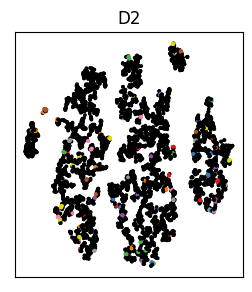

In [132]:
%time result_DBSCAN_D3 = do_clustering(cluster_datasetD3, DBSCAN(eps=0.58, min_samples=6))
visualize_clusters(cluster_datasetD3, result_DBSCAN_D3)

In [134]:
adjusted_rand_score(ds['quality'], result_DBSCAN_D3[0])

0.019589093284090028

In [135]:
h3_DBSCAN, c3_DBSCAN, v3_DBSCAN = homogeneity_completeness_v_measure(ds['quality'], result_DBSCAN_D3[0])
h3_DBSCAN, c3_DBSCAN, v3_DBSCAN

(0.1128184661645422, 0.1930317356207642, 0.1424066043226019)

In [ ]:
##################### AgglomerativeClustering #########################

In [139]:
from sklearn.cluster import AgglomerativeClustering


In [140]:
%time result_AgglomerativeClusteringD1 = do_clustering(cluster_datasetD1, AgglomerativeClustering(n_clusters=7))


CPU times: total: 1.62 s
Wall time: 1.66 s


In [141]:
adjusted_rand_score(ds['quality'], result_AgglomerativeClusteringD1[0])

0.8186294583001992

In [143]:

h1_Agg, c1_Agg, v1_Agg = homogeneity_completeness_v_measure(ds['quality'], result_AgglomerativeClusteringD1[0])
h1_Agg, c1_Agg, v1_Agg

(0.9861582951524461, 0.7931873922297686, 0.8792089496769043)

CPU times: total: 1.58 s
Wall time: 1.6 s


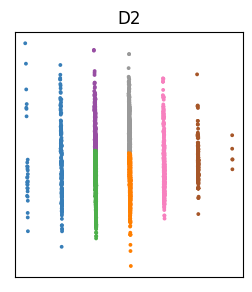

In [144]:
## D2 ##
%time result_AgglomerativeClusteringD2 = do_clustering(cluster_datasetD2,  AgglomerativeClustering(n_clusters=7))
visualize_clusters(cluster_datasetD2, result_AgglomerativeClusteringD2)

In [145]:
adjusted_rand_score(ds['quality'], result_AgglomerativeClusteringD2[0])

0.7715315994923445

In [146]:
h2_Agg, c2_Agg, v2_Agg = homogeneity_completeness_v_measure(ds['quality'], result_AgglomerativeClusteringD2[0])
h2_Agg, c2_Agg, v2_Agg

(0.9861582951524458, 0.7682211332299423, 0.8636531308904456)

CPU times: total: 1.23 s
Wall time: 1.28 s


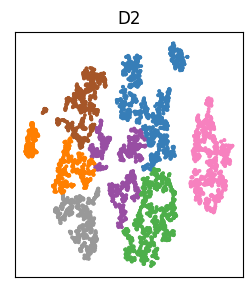

In [147]:
## D3 ##
%time result_AgglomerativeClusteringD3 = do_clustering(cluster_datasetD3,  AgglomerativeClustering(n_clusters=7))
visualize_clusters(cluster_datasetD3, result_AgglomerativeClusteringD3)

In [148]:
adjusted_rand_score(ds['quality'], result_AgglomerativeClusteringD3[0])

0.4079642328784467

In [149]:
h3_Agg, c3_Agg, v3_Agg = homogeneity_completeness_v_measure(ds['quality'], result_AgglomerativeClusteringD3[0])
h3_Agg, c3_Agg, v3_Agg

(0.7993043900482991, 0.5310673211542206, 0.6381441181217963)